In [2]:
# load the part bboxes

In [5]:
import json
import os

In [4]:
bboxes_dir = '/data/VLMGroundingProject/BaselineResults/PascalPart/GroundingDino'

In [10]:
for filename in os.listdir(bboxes_dir):
    if filename.endswith('.json'):
        filepath = os.path.join(bboxes_dir, filename)
        with open(filepath, 'r') as f:
            bbox_data = json.load(f)
            for obj_name, parts_dict in bbox_data.items():
                parts = parts_dict.get('parts', {})
                for part_name, bbox_data in parts.items():
                    bboxes = bbox_data[0]  # bbox_data is a list with: list of bboxes, list of scores, list of phrases
                    scores = bbox_data[1]
                    phrases = bbox_data[2]
                    print(f"Object: {obj_name}, Part: {part_name}, \nBBox: {bboxes}, \nScores: {scores}, \nPhrases: {phrases}")
                    print('---')
        break

Object: person, Part: left upper leg, 
BBox: [[311.84649658203125, 50.642730712890625, 476.593017578125, 353.4303283691406], [410.5652770996094, 165.11941528320312, 468.0131530761719, 352.5326232910156]], 
Scores: [0.5089928507804871, 0.3641757071018219], 
Phrases: ['person', 'leg']
---
Object: person, Part: right lower arm, 
BBox: [[312.5274658203125, 51.234649658203125, 476.6749267578125, 353.2030029296875]], 
Scores: [0.6630552411079407], 
Phrases: ['person lower arm']
---
Object: person, Part: left lower leg, 
BBox: [[311.93365478515625, 50.9371337890625, 476.6009521484375, 353.40655517578125]], 
Scores: [0.4927898645401001], 
Phrases: ['person']
---
Object: person, Part: torso, 
BBox: [[18.21166229248047, 46.167724609375, 254.75912475585938, 328.7373352050781], [312.12677001953125, 51.1380615234375, 476.47808837890625, 353.2247009277344]], 
Scores: [0.36130601167678833, 0.3655201196670532], 
Phrases: ['person torso', 'person torso']
---
Object: person, Part: neck, 
BBox: [[312.391

In [32]:
import cv2
import matplotlib.pyplot as plt

def draw_bboxes_on_image(image_path, bboxes, color=(0, 255, 0), thickness=2):
    """
    Draws bounding boxes on an image and displays it in a Jupyter notebook.

    Args:
        image_path (str): Path to the input image.
        bboxes (list): List of bounding boxes, each as [x1, y1, x2, y2].
        color (tuple): Color for the boxes (B, G, R).
        thickness (int): Thickness of the box lines.
    """
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image not found at {image_path}")

    # Draw bounding boxes
    for bbox in bboxes:
        x1, y1, x2, y2 = bbox
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), color, thickness)

    # Convert BGR to RGB for matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

In [26]:
import sys
sys.path.append('/home/ksmehrab/AttentionGrounding/Baselines')
from utils import read_txt_file

In [27]:
pascal_image_dir = "/data/Pascal_VOC_2012/VOCdevkit/VOC2012/JPEGImages" # 17125 images
val_filepath = "/data/PartSegmentationDatasets/PascalPart/val.txt" # 925 images. File contains just the file prefix. Add .jpg extension for images, and .mat extension for annotations
val_filenames = read_txt_file(val_filepath)

[[[311.84649658203125, 50.642730712890625, 476.593017578125, 353.4303283691406], [410.5652770996094, 165.11941528320312, 468.0131530761719, 352.5326232910156]], [0.5089928507804871, 0.3641757071018219], ['person', 'leg']]


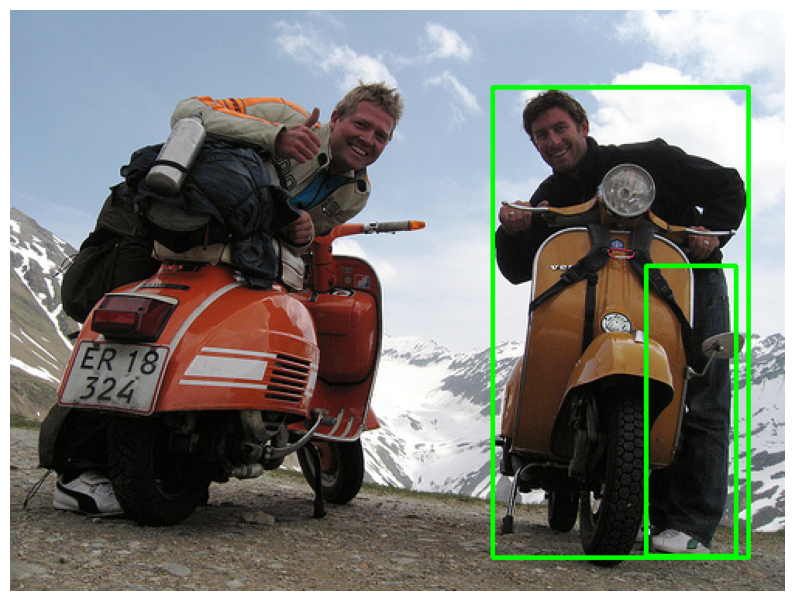

[[[310.08367919921875, 98.36314392089844, 473.61663818359375, 359.71844482421875], [365.5709228515625, 244.60397338867188, 414.93927001953125, 359.6106262207031]], [0.48174619674682617, 0.3745114803314209], ['motorbike back wheel', '##ke back wheel']]


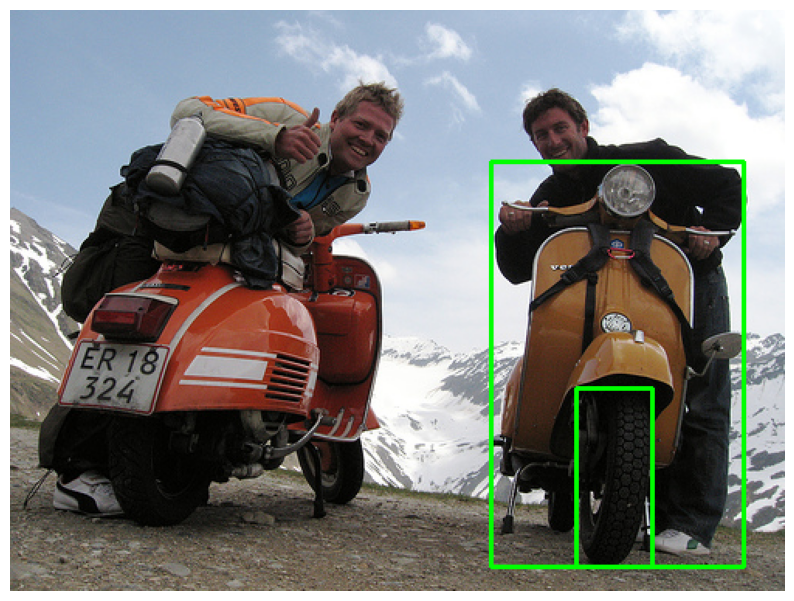

In [35]:
for filename in val_filenames:
    pred_bboxes_filename = filename + '.json'
    img_filename = filename + '.jpg'

    bboxes_filepath = os.path.join(bboxes_dir, pred_bboxes_filename)
    with open(bboxes_filepath, 'r') as f:
        bbox_data = json.load(f)
        for obj_name, parts_dict in bbox_data.items():
            parts = parts_dict.get('parts', {})
            for part_name, bbox_data in parts.items():
                bboxes = bbox_data[0]  # bbox_data is a list with: list of bboxes, list of scores, list of phrases
                print(bbox_data)
                draw_bboxes_on_image(os.path.join(pascal_image_dir, img_filename), bboxes)
                break
        break